## <center> Аттестация 1. Python. Практическое задание в Jupiter

В данном блоке вам предстоит решить задачу, которую автор когда-то решал на одном из своих собеседований.
Вам предоставлена таблица с данными (скачать файл можно на платформе) о ежедневной выработке энергии солнечными батареями. Информация в ней содержится в двух столбцах: 
* date - дата наблюдения
* cum_power - накопленная (кумулятивная) выработка энергии на указанный день

То есть перед вами классический пример временного ряда: числовой показатель, зависящий от времени. Давайте с ним поработаем.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

1. В нашем временном ряде есть несколько пропусков, они обозначены числом -1. Заполните пропуски средним арифметическим между двумя соседними наблюдениями: </p>
    $$x^*_i  = \frac{x_{i-1} + x_{i+1}}{2}$$ 
    
Совет: проще всего будет сделать это, используя цикл по индексам элементов столбца cum_power, но вы можете предложить более изящное решение.


In [24]:
solar_power_dt = pd.read_csv('solarpower.csv', sep=',')
display(solar_power_dt[solar_power_dt['cum_power'] == -1])

for i in solar_power_dt.index:
    if (i+1 < solar_power_dt.shape[0]) & (i > 0) & (solar_power_dt['cum_power'][i] == -1):
        solar_power_dt['cum_power'][i] = ((solar_power_dt['cum_power'][i-1])+ (solar_power_dt['cum_power'][i+1]))/2

print('Расчетное значение первого пропуска: {}'.format(solar_power_dt['cum_power'][45]))
print('----')
print('Расчетное значение второго пропуска: {}'.format(solar_power_dt['cum_power'][647]))

,date,cum_power
45,2017-02-15,-1.0
647,2018-10-10,-1.0


Расчетное значение первого пропуска: 20255.0
----
Расчетное значение второго пропуска: 27998.0


C:\Users\USER\AppData\Local\Temp/ipykernel_15148/3012891892.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_power_dt['cum_power'][i] = ((solar_power_dt['cum_power'][i-1])+ (solar_power_dt['cum_power'][i+1]))/2


2. Теперь, когда таблица заполнена, создайте столбец day_power - ежедневный прирост выработки солнечной энергии.

    После чего создайте данные о ежемесячной выработке энергии на каждый год. 
    
Совет: для того, чтобы выделить из даты год и месяц проще всего воспользоваться методом аксессора dt.to_period('M'), который позволяет выделять периоды, в данном случае 'М' - месяц.

In [25]:
#ver.1
solar_power_dt['day_power'] = solar_power_dt['cum_power'].diff(periods=1)
display(solar_power_dt.head())

,date,cum_power,day_power
0,2017-01-01,20111.0,NaN
1,2017-01-02,20112.0,1.0
2,2017-01-03,20115.0,3.0
3,2017-01-04,20117.0,2.0
4,2017-01-05,20119.0,2.0


In [26]:
#ver.2
diff=[np.NaN]
for i in range(len(solar_power_dt['cum_power'])-2):
    diff.append(solar_power_dt['cum_power'][i+1]-solar_power_dt['cum_power'][i])
diff.append(np.nan)
solar_power_dt['day_power']=diff
print(solar_power_dt.head())

         date  cum_power  day_power
0  2017-01-01    20111.0        NaN
1  2017-01-02    20112.0        1.0
2  2017-01-03    20115.0        3.0
3  2017-01-04    20117.0        2.0
4  2017-01-05    20119.0        2.0


In [27]:
solar_power_dt['date'] = pd.to_datetime(solar_power_dt['date'])
solar_power_dt['year_month'] = solar_power_dt['date'].dt.to_period('M')
solar_power_dt['month_power'] = solar_power_dt['day_power']
solar_power_m = solar_power_dt.pivot_table(values='month_power', index=['year_month'], aggfunc='sum')
print(solar_power_m)

            month_power
year_month             
2017-01            97.0
2017-02           104.0
2017-03           334.0
2017-04           489.0
2017-05           589.0
2017-06           645.0
2017-07           562.0
2017-08           467.0
2017-09           346.0
2017-10           199.0
2017-11            97.0
2017-12            36.0
2018-01            64.0
2018-02           194.0
2018-03           270.0
2018-04           439.0
2018-05           652.0
2018-06           563.0
2018-07           682.0
2018-08           530.0
2018-09           416.0
2018-10           231.0


3. Постройте график временного ряда - ежемесячной выработки солнечной энергии. Не забудьте подписать оси и сам график.
Укажите в какие сезоны наблюдается подъем, а в какие спад?

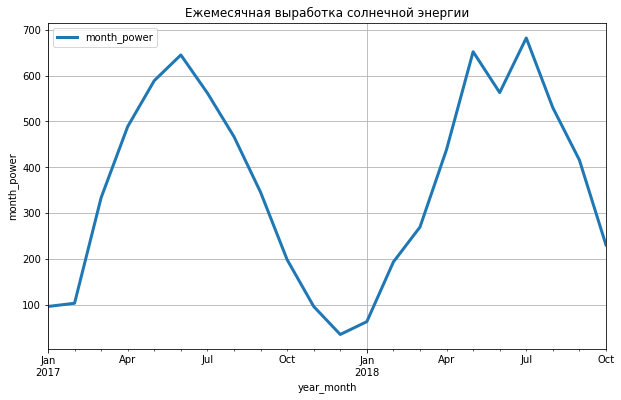

In [28]:
solar_power_m.plot(
    kind='line',
    figsize=(10, 6),
    xlabel='year_month',
    ylabel='month_power',
    title='Eжемесячная выработка солнечной энергии',
    grid = True,
    lw=3
);

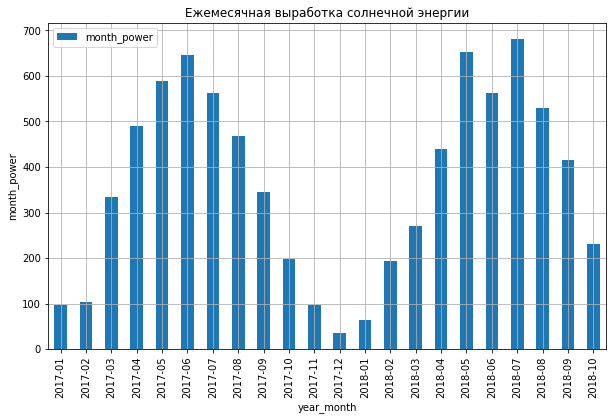

In [29]:
solar_power_m.plot(
    kind='bar',
    figsize=(10, 6),
    xlabel='year_month',
    ylabel='month_power',
    title='Eжемесячная выработка солнечной энергии',
    grid = True
);

На графиках временного ряда регулярной выработки солнечной энергии видно, что рост энергии происходит в сезонах зима - лето (январь - июнь, июль), снижение: лето - зима (июль - декабрь).